# Phase VI — Optimization Diagnostics

This notebook analyzes the convergence behavior and failure modes
of the Linear Regression engine implemented from scratch.

## phase VI.1 
This section implements batch gradient descent for linear regression also some feature engineering, tracking loss convergence and hyperparameter effects through complete training cycles.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
import sys
import os

# adding the project to root path
sys.path.append(os.path.abspath('..'))  # '..' goes one level up from notebooks

In [10]:
from scripts.linear_regression import LinearRegressionMaster
from scripts.model_utils import *
from scripts.data_preprocessing import *

In [46]:
train_df = pd.read_csv("../data/train.csv") # loading our train.csv data

In [47]:
y = log_transform(train_df)

In [48]:
X_df = train_df.drop(columns = "SalePrice")

In [49]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [50]:
X_df = nan_check(X_df)  # this function just fills median of numneric columns at Nan

In [51]:
X_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,69.0,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [52]:
X_df.isna().sum().sum()

np.int64(7481)

In [53]:
X_df.shape

(1460, 80)

In [54]:
X_df = none_check_cat(X_df)  # this function fills None for categorical columns 

In [55]:
X_df.isna().sum().sum()

np.int64(0)

In [58]:
categorical = categorical_cols(X_df)

In [59]:
X_df = onehot_encode_categorical(X_df,categorical)

In [61]:
X_df.shape  # succesfully onehot encode applied...expansion of columns

(1460, 304)

In [62]:
X_df.isna().sum().sum()

np.int64(0)

In [63]:
X_df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object)

In [79]:
X = X_df.astype(float).values   # since y is already a numpy array , this line converts all columns to float (handling strings/objects) then extracts as NumPy array

In [81]:
print("the dimensions of X  are :")
print()
X 

the dimensions of X  are :



array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 2.000e+01, 8.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 6.000e+01, 6.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 6.600e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.459e+03, 2.000e+01, 6.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.460e+03, 2.000e+01, 7.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]], shape=(1460, 304))

In [82]:
# sanity check
X.shape[0] == y.shape[0]   # ensure that the no of rows of X and y are equal

True

In [83]:
X_train , X_test , y_train , y_test = train_test_split_np(X,y) # tain test split

In [84]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1168, 304), (292, 304), (1168,), (292,))

In [85]:
X_train_scaled , X_test_scaled , mu , sigma = standardize_train_test(X_train,X_test)

In [94]:
print("the shape of X_train and X_test are :",X_train_scaled.shape,X_test_scaled.shape)
print()
print("the shape of y_train and y_test are :",y_train.shape,y_test.shape)

the shape of X_train and X_test are : (1168, 304) (292, 304)

the shape of y_train and y_test are : (1168,) (292,)


In [95]:
# lets do a sanity check
np.mean(X_train_scaled,axis = 0)[:5]

array([ 5.40853511e-17, -4.45087270e-17,  3.24096248e-16,  3.54311329e-17,
       -7.00661941e-17])

In [96]:
np.std(X_train_scaled,axis = 0)[:5]

array([1., 1., 1., 1., 1.])

In [97]:
# our standardization worked properly
# the rough calculate of mean = (5 - 4 + 3 + 3 - 7)  = 0
# and std replying with 1.

In [99]:
X_train_bias , X_test_bias = bias_term(X_train_scaled,X_test_scaled) # adding a bias column

In [102]:
X_train_bias.shape,X_test_bias.shape

((1168, 305), (292, 305))

In [103]:
# the upper ceel output clearly shows the increased size of columns indicating  bias term added succesfully

In [107]:
model_a = LinearRegressionMaster()
model_a_g_d = model_a.fit_gradient_descent(X_train_bias,y_train,0.1,500) # 0.1 of learning rate and 500 iters
loss_a = model_a.loss_history

In [109]:
model_a_g_d

In [118]:
loss_a[:10]

[np.float64(58.63627903126916),
 np.float64(47.49660400106378),
 np.float64(38.47416662993438),
 np.float64(31.165987240081172),
 np.float64(25.24625462344729),
 np.float64(20.45115016413355),
 np.float64(16.56700027061075),
 np.float64(13.420734808609705),
 np.float64(10.872168110688337),
 np.float64(8.807749305631718)]

In [115]:
model_b = LinearRegressionMaster()
model_b_g_d = model_b.fit_gradient_descent(X_train_bias,y_train,0.0001,500)
loss_b = model_b.loss_history

In [116]:
model_b_g_d

In [119]:
loss_b[:10]

[np.float64(72.38255243078801),
 np.float64(72.36786076693345),
 np.float64(72.35317283889296),
 np.float64(72.33848864290411),
 np.float64(72.32380817521673),
 np.float64(72.30913143209281),
 np.float64(72.29445840980658),
 np.float64(72.27978910464432),
 np.float64(72.26512351290442),
 np.float64(72.25046163089726)]

In [121]:
# there is a huge diffreence gap between alpha = 0.1 and 0.0001

## Phase VI.2 — Convergence Diagnostics

This section visualizes the loss curves for different learning rates
to study convergence behavior of gradient descent


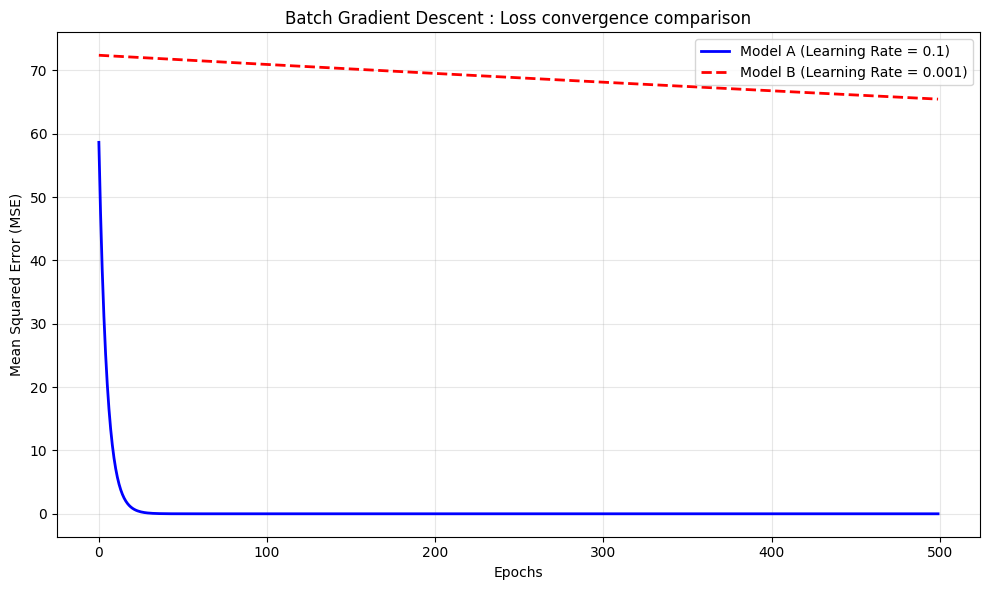

In [130]:
# create figure 
plt.figure(figsize = (10,6))
# plot loss a
plt.plot(loss_a , 'b-' , label = 'Model A (Learning Rate = 0.1)' , linewidth = 2) # 'b-' : blue solid line
# plot loss b
plt.plot(loss_b , 'r--' , label = 'Model B (Learning Rate = 0.001)' , linewidth = 2) # 'r--' : red dashed line
# label axes
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Batch Gradient Descent : Loss convergence comparison')

# addng legend
plt.legend()
plt.grid(True , alpha = 0.3)

# show plot -- tight
plt.tight_layout()
plt.show()

## Linear vs. Log Scale Comparison

**Linear**: Raw MSE values → Final performance comparison  
**Log**: Reveals convergence dynamics → Hyperparameter analysis


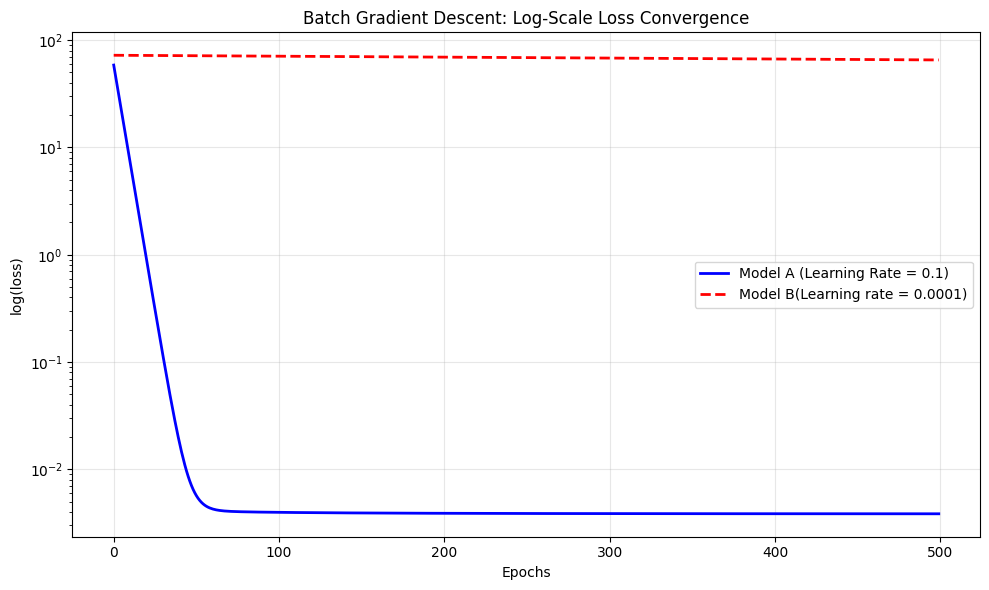

In [129]:
# create figure 
plt.figure(figsize=(10, 6))

# plot loss curves
plt.plot(loss_a, 'b-', label='Model A (Learning Rate = 0.1)', linewidth=2)
plt.plot(loss_b, 'r--', label='Model B(Learning rate = 0.0001)', linewidth=2)
 
# labels
plt.xlabel('Epochs')
plt.ylabel('log(loss)')  # Changed label

# Log scale for y-axis (shows log(loss))
plt.yscale('log')  

plt.title('Batch Gradient Descent: Log-Scale Loss Convergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Phase VI.3 — Feature Scaling Effect

This section demonstrates the impact of feature scaling on gradient descent.
The same learning rate and number of iterations are used for both scaled and
unscaled data to highlight differences in convergence behavior.


In [140]:
X_train_bias_unscaled = np.c_[np.ones((X_train.shape[0], 1)), X_train]


In [146]:
unscaled_model = LinearRegressionMaster()
unscaled_model.fit_gradient_descent(X_train_bias_unscaled,y_train,0.1,500)
loss_un = unscaled_model.loss_history

In [153]:
loss_un[::25]

[np.float64(1.7892920683013288e+16),
 np.float64(inf),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan)]

### observation
During training on unscaled features, the loss diverged and became infinite
after several iterations. This behavior highlights the numerical instability
of gradient descent when feature magnitudes are not normalized.

## Phase VI.4 — Failure Mode Analysis

This section examines scenarios where linear regression can fail or behave
undesirably, including residual patterns, sensitivity to outliers, and
multicollinearity among features.


### Phase VI.4.1 — Residual Analysis

In [154]:
y_train_pred = model_a.predict(X_train_bias)

In [155]:
residuals = y_train - y_train_pred

In [156]:
# lets plot the residual

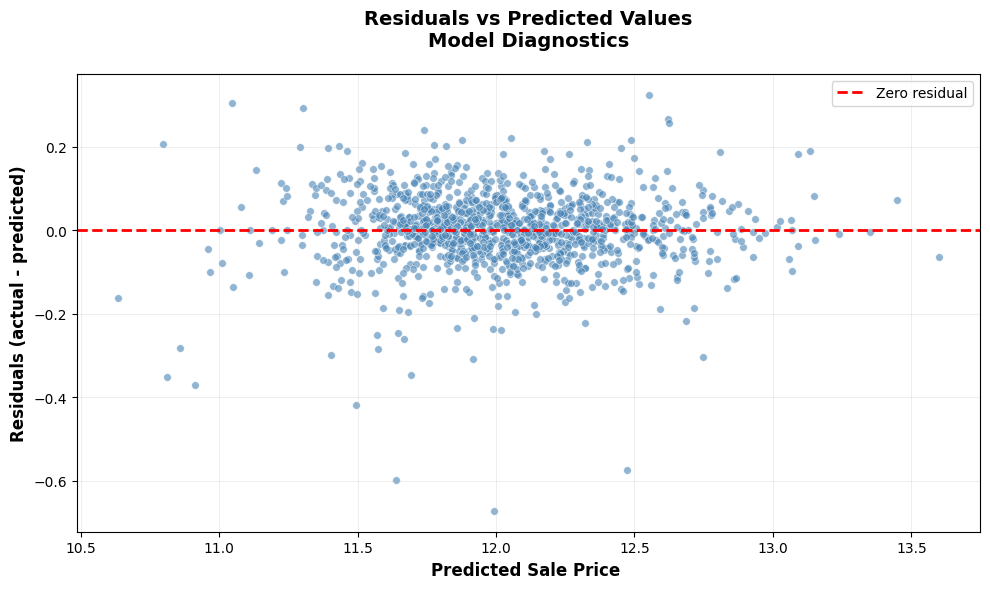

In [158]:
# create a figure
plt.figure(figsize =(10,6))

# scatter residuals vs prediction (alpha for transperency)
plt.scatter(y_train_pred , residuals , alpha = 0.6 , s = 30 , c = 'steelblue' , edgecolors = 'white',
           linewidth = 0.5)

# zero residual reference line \
plt.axhline(y = 0 , color = 'red' , linestyle = '--' , linewidth = 2 , label = 'Zero residual')

#styling
plt.xlabel('Predicted Sale Price ' , fontsize=12 , fontweight='bold')
plt.ylabel('Residuals (actual - predicted)' , fontsize=12 , fontweight='bold')
plt.title('Residuals vs Predicted Values\nModel Diagnostics' , fontsize=14 , fontweight='bold', pad=20)

# grid and legend
plt.grid(True, alpha=0.3 , linestyle='-' , linewidth=0.5)
plt.legend(loc='upper right')

# tight layout + show
plt.tight_layout()
plt.show()

### Observation
The residual plot shows the distribution of prediction errors against
predicted values. A roughly random scatter around zero suggests that the
linear regression assumptions are reasonably satisfied.

### Phase VI.4.2 — Outlier Impact Analysis 

In [163]:
y_train_original = y_train.copy()  # save original target

In [164]:
# create an artificial outliner
outliner_index = np.argmax(y_train)
y_train[outliner_index] = y_train[outliner_index] * 2

In [166]:
# retrain the model
outliner_model = LinearRegressionMaster()
outliner_model.fit_gradient_descent(X_train_bias , y_train , alpha = 0.01 , epochs  = 500)

In [168]:
# compare coefficients
theta_original = model_a.theta
theta_outliner = outliner_model.theta

print("the difference is :",np.linalg.norm(theta_outliner - theta_original))


the difference is : 0.26818745115744824


In [169]:
#restore the original target
y_train = y_train_original

### Observation
The L2 norm of the difference between the original and outlier-affected
parameter vectors was non-trivial, indicating that a single extreme data
point can significantly alter the fitted linear model.

###  Phase VI.4.3 — Multicollinearity Check (final Step)

In [173]:
X_df.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False


In [175]:
corr_matrix = X_df.corr() # compute correlation matrix

In [176]:
# take absolute values 
corr_abs = corr_matrix.abs()

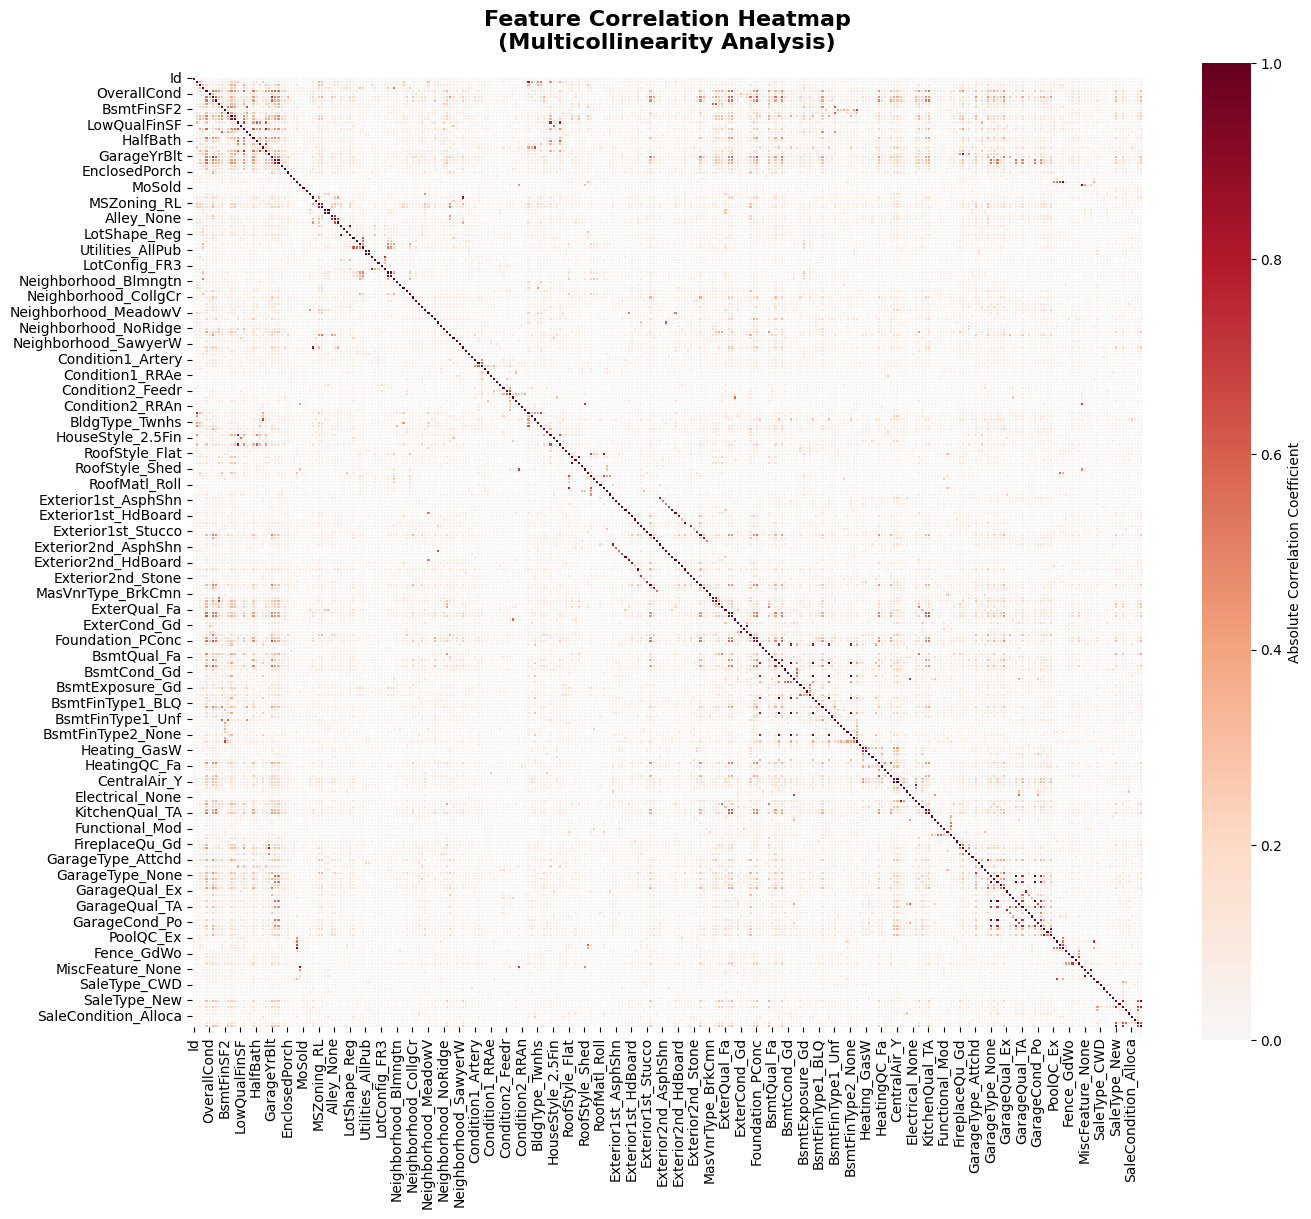

In [180]:
# visualze the correlation matrix using heatmap

# figure
plt.figure(figsize = (14,12))

# correlation heatmap
sns.heatmap(
    corr_abs,
    cmap = "RdBu_r",  # red blue better for correaltions
    center = 0,
    cbar_kws = {'label' : 'Absolute Correlation Coefficient'},
    square = True,     # pperfect squares
    linewidths = 0.5,
    annot = False,
    cbar = True
)

# labeling
plt.title("Feature Correlation Heatmap\n(Multicollinearity Analysis)", 
          fontsize=16, fontweight='bold', pad=20)

# tight layot
plt.tight_layout()
plt.show()

### Observation

The correlation heatmap reveals strong dependencies among several features,
indicating the presence of multicollinearity. This explains coefficient
instability in ordinary least squares and motivates the use of regularization.

**Red zones (>0.7)**: High correlation → **Feature redundancy**  
**Blue zones (<0.3)**: Independent features → **Keep both**  
**Diagonal (1.0)**: Self-correlation (expected)
